### Introduction

Today we are going to explore "Students Performance in Exams" datasets that is available on kaggle. We will visualize that in different aspects and discover information.

In [5]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [6]:
# load the dataset
df = pd.read_csv("D:/Datasets/StudentsPerformance.csv")

In [7]:
# lets see a sample of the data 

df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
662,female,group D,some college,free/reduced,none,55,71,69
239,male,group C,associate's degree,standard,none,84,80,80
684,male,group B,some college,standard,completed,62,66,68
406,male,group B,associate's degree,standard,completed,65,65,63
9,female,group B,high school,free/reduced,none,38,60,50
960,female,group A,some college,standard,none,56,58,64
277,female,group E,high school,standard,completed,59,63,75
32,female,group E,master's degree,free/reduced,none,56,72,65
659,male,group D,associate's degree,standard,none,90,87,85
828,female,group D,some high school,free/reduced,completed,69,86,81


In [8]:
# lets check null values

print(pd.isnull(df).sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [9]:
# info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
for col in df.columns:
    if df[col].dtype == "object":
        print("Current Column: {}".format(col))
        print(df[col].value_counts())
        print("=" * 26)
        print("\n")
    

Current Column: gender
female    518
male      482
Name: gender, dtype: int64


Current Column: race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


Current Column: parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


Current Column: lunch
standard        645
free/reduced    355
Name: lunch, dtype: int64


Current Column: test preparation course
none         642
completed    358
Name: test preparation course, dtype: int64




#### Categorical features are: gender, race, parental level of education, lunch, test preparation course

In [11]:
# describe the dataset (numerical features only)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [12]:
# Passing score 
Passing_mark = 50

# Average of Total score 

df["Total_score"] = round((df["math score"] + df["reading score"] + df["writing score"]) /3 , 2)


In [13]:
# Add a column for fail and pass

df["Did_pass"] = False
df["Did_pass"] = df["Total_score"] > Passing_mark 

In [14]:
df["Did_pass"].value_counts()

True     891
False    109
Name: Did_pass, dtype: int64

##### This dataset is quite skewed in the scenario that there are very little student who failed, so maybe I should lower the passing score. to get a more accurate representation

In [15]:
# sanity check
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Did_pass
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,True
1,female,group C,some college,standard,completed,69,90,88,82.33,True
2,female,group B,master's degree,standard,none,90,95,93,92.67,True
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,False
4,male,group C,some college,standard,none,76,78,75,76.33,True


In [16]:
# create a helper fucntion
# count number of passed based on a certain column 

def get_passed(column, condition, dataFrame):
    res = 0
    res = len(dataFrame[dataFrame[column] == condition].loc[dataFrame["Did_pass"] == True])
    
    return res

### Visualization

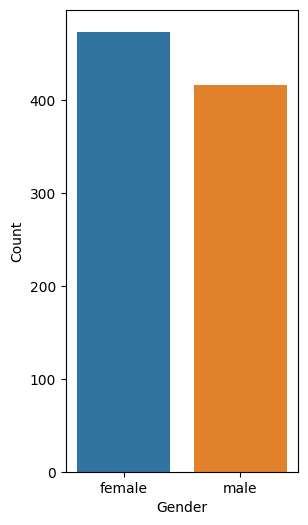

In [17]:
# ploting the graph between gender and student passed
plt.figure(figsize = (3,6))

sns.countplot(x = "gender", data = df[df["Did_pass"] == True])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [18]:
males_who_passed = get_passed("gender", "male", df)
females_who_passed = get_passed("gender", "female", df)
print("Number of males who passed: {}".format(males_who_passed))
print("Number of females who passed: {}".format(females_who_passed))

Number of males who passed: 417
Number of females who passed: 474


##### So Females are more likely to pass?

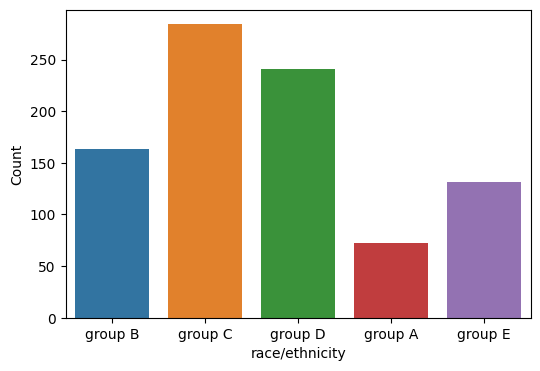

In [19]:
# lets analyze the ethnicity/ race category 
plt.figure(figsize = (6,4))

sns.countplot(x = "race/ethnicity", data = df[df["Did_pass"] == True])
plt.xlabel("race/ethnicity")
plt.ylabel("Count")
plt.show()

In [20]:
for race in df["race/ethnicity"].unique():
    print("Number of people passed, {} are from race: {}".format(race, get_passed("race/ethnicity", race, df)))

Number of people passed, group B are from race: 163
Number of people passed, group C are from race: 284
Number of people passed, group A are from race: 72
Number of people passed, group D are from race: 241
Number of people passed, group E are from race: 131


##### Looks like people from group C are more likely to pass exams

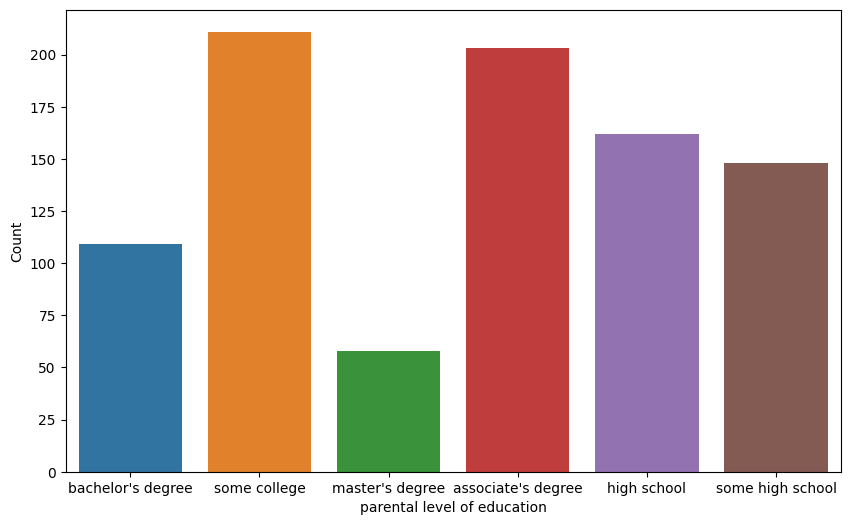

In [21]:
# ploting the graph between parental level of education and student passed

plt.figure(figsize = (10,6))
sns.countplot(x = "parental level of education", data = df[df["Did_pass"] == True])

plt.xlabel("parental level of education")
plt.ylabel("Count")
plt.show()

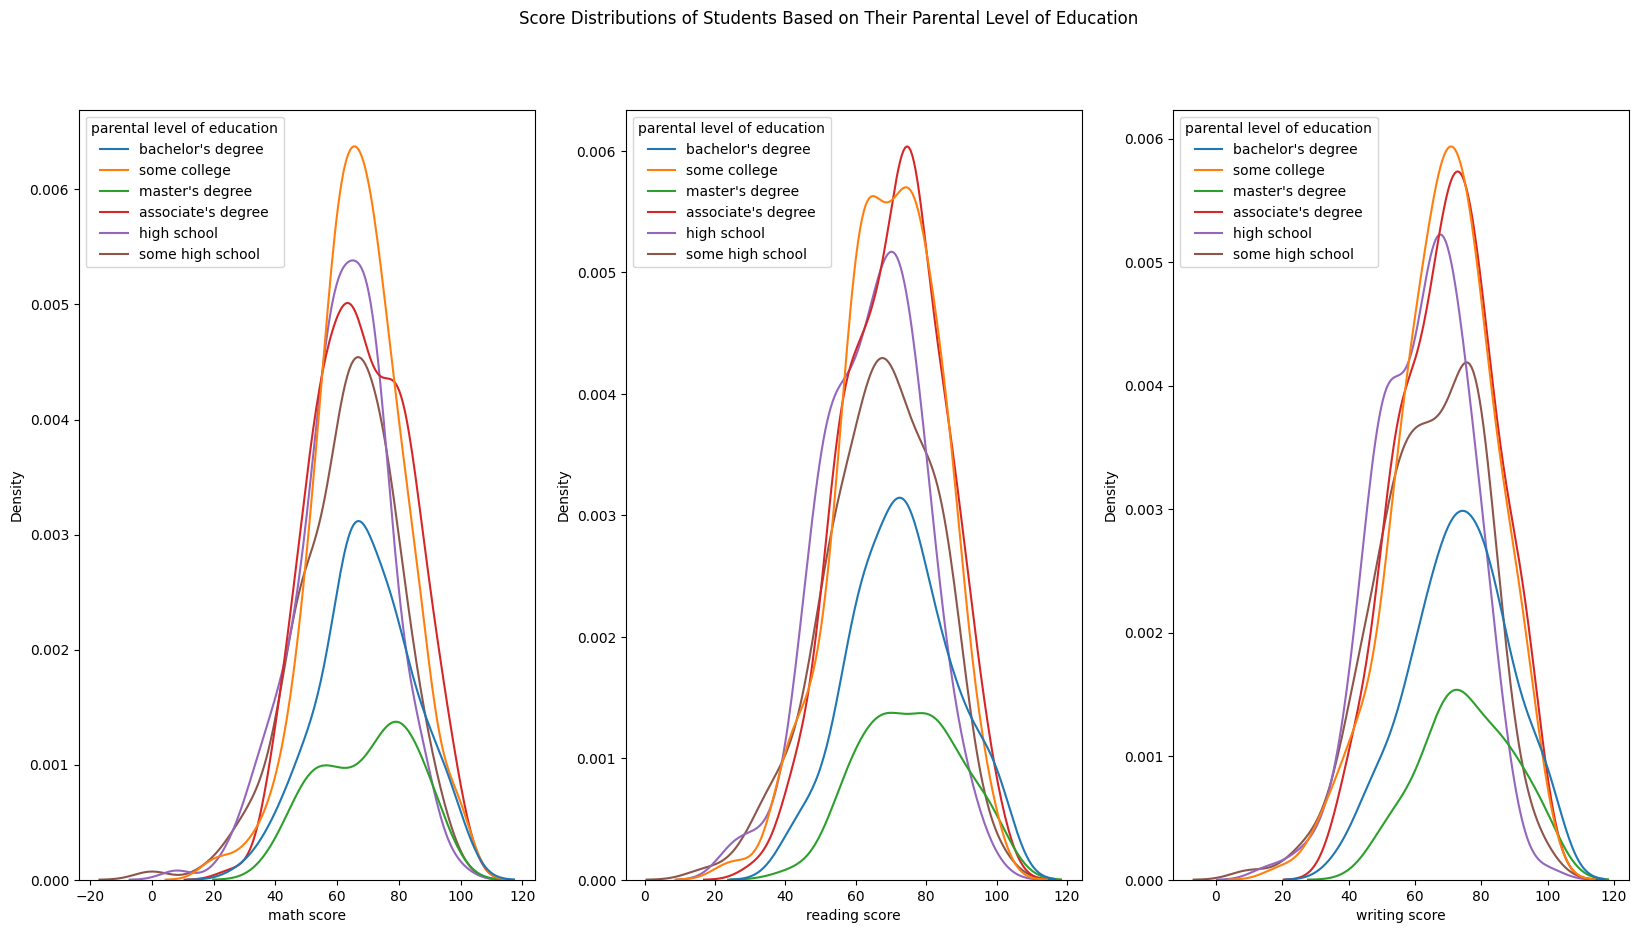

In [22]:
fig, ax=plt.subplots(ncols=3, figsize=(20,10))

fig.suptitle('Score Distributions of Students Based on Their Parental Level of Education')

a=sns.kdeplot(data=df,x='math score',ax=ax[0], hue='parental level of education')

b= sns.kdeplot(data=df, x='reading score', ax=ax[1], hue='parental level of education')

c= sns.kdeplot(data=df, x='writing score', ax=ax[2], hue='parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0, 1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0, 1))

In [23]:
for edu in df["parental level of education"].unique():
    print("Parents of: {}  passed student are from {}".format(get_passed("parental level of education", edu, df), edu))

Parents of: 109  passed student are from bachelor's degree
Parents of: 211  passed student are from some college
Parents of: 58  passed student are from master's degree
Parents of: 203  passed student are from associate's degree
Parents of: 162  passed student are from high school
Parents of: 148  passed student are from some high school


##### WOW, it looks like student whose parents are have college or associates degree are more likely to pass than those with a master's degree. 

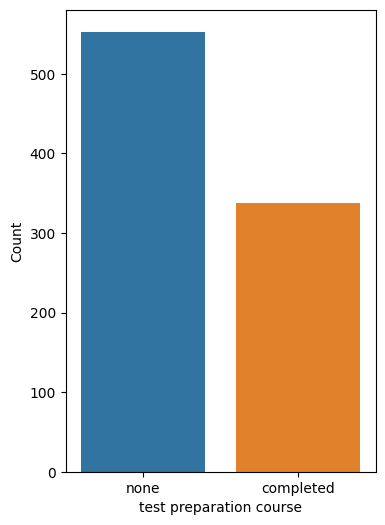

In [24]:
# ploting the graph between test preparation course and student passed

plt.figure(figsize = (4,6))
sns.countplot(x = "test preparation course", data = df[df["Did_pass"] == True])

plt.xlabel("test preparation course")
plt.ylabel("Count")
plt.show()

In [25]:
for edu in df["test preparation course"].unique():
    print("Number of student passed: {} have done {}".format(get_passed("test preparation course", edu, df), edu))

Number of student passed: 553 have done none
Number of student passed: 338 have done completed


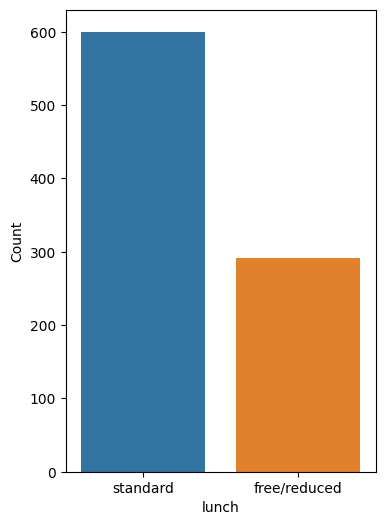

In [26]:
# ploting the graph between student taking lunch and getting passed

plt.figure(figsize = (4,6))
sns.countplot(x = "lunch", data = df[df["Did_pass"] == True])

plt.xlabel("lunch")
plt.ylabel("Count")
plt.show()

In [27]:
for edu in df["lunch"].unique():
    print("Number of student passed: {} are taking {} lunch".format(get_passed("lunch", edu, df), edu))
df['lunch'].value_counts()

Number of student passed: 600 are taking standard lunch
Number of student passed: 291 are taking free/reduced lunch


standard        645
free/reduced    355
Name: lunch, dtype: int64

##### Most of the students are eating standard lunch(to their fullest)
